In [ ]:
# installing the kaggle lib
!pip install kaggle

In [ ]:
# configering the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           7146        253  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           7354        269  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           8614        154  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

catttttt.jpeg	  drive		 resized_img	       test1.zip
doggiiiii.jpg	  IMG_0337.HEIC  sample_data	       train
dogs-vs-cats.zip  kaggle.json	 sampleSubmission.csv  train.zip


In [ ]:
import zipfile
# Extracting the compressed dataset
from zipfile import ZipFile
df = '/content/dogs-vs-cats.zip'
with ZipFile(df, 'r') as zip:
  zip.extractall()

In [ ]:
train = '/content/train.zip'
with ZipFile(train, 'r') as zip:
  zip.extractall()

In [ ]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('number if img : ', file_count)

number if img :  25000


In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.9139.jpg', 'dog.6157.jpg', 'dog.5151.jpg', 'cat.1453.jpg', 'cat.5585.jpg', 'cat.10409.jpg', 'cat.10420.jpg', 'cat.6474.jpg', 'cat.10632.jpg', 'cat.8710.jpg', 'dog.3110.jpg', 'dog.11405.jpg', 'cat.8539.jpg', 'dog.12157.jpg', 'dog.7240.jpg', 'cat.989.jpg', 'dog.12431.jpg', 'dog.4850.jpg', 'cat.10340.jpg', 'dog.12274.jpg', 'dog.6791.jpg', 'cat.8763.jpg', 'dog.962.jpg', 'cat.6454.jpg', 'dog.5315.jpg', 'dog.2308.jpg', 'cat.3066.jpg', 'cat.7987.jpg', 'cat.11519.jpg', 'dog.2918.jpg', 'cat.2570.jpg', 'dog.11528.jpg', 'cat.7575.jpg', 'dog.5678.jpg', 'dog.1424.jpg', 'dog.11513.jpg', 'cat.3665.jpg', 'dog.4222.jpg', 'dog.3504.jpg', 'cat.5792.jpg', 'cat.3447.jpg', 'dog.1646.jpg', 'cat.623.jpg', 'cat.1192.jpg', 'cat.9523.jpg', 'dog.6459.jpg', 'cat.11357.jpg', 'dog.5441.jpg', 'cat.690.jpg', 'cat.7514.jpg', 'cat.5263.jpg', 'cat.11227.jpg', 'dog.4206.jpg', 'cat.12101.jpg', 'dog.5305.jpg', 'dog.5203.jpg', 'dog.9772.jpg', 'cat.5165.jpg', 'dog.11961.jpg', 'cat.428.jpg', 'cat.2727.jpg', 'dog.9000.jpg

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

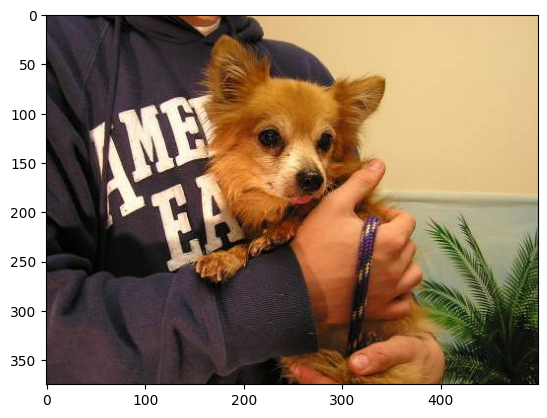

In [ ]:
# Dog img
img = mping.imread('/content/train/dog.11763.jpg')
imgplot = plt.imshow(img)
plt.show()

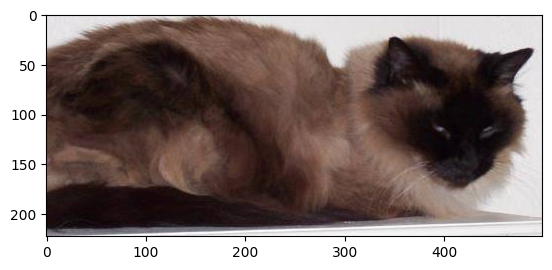

In [ ]:
# cat img
img = mping.imread('/content/train/cat.424.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
file_name = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_name:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1


print('Number of dog img : ', dog_count)
print('Number of cat img : ', cat_count)

Number of dog img :  12500
Number of cat img :  12500


In [ ]:
# Creating a directory for resize images
os.mkdir('/content/resized_img')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/resized_img/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename



  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_path = resized_folder + filename
  img.save(new_img_path)

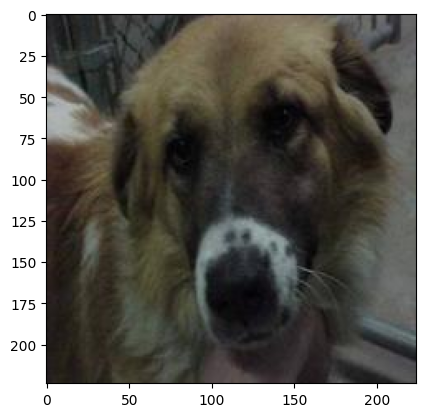

In [ ]:
img = mping.imread('/content/resized_img/dog.10259.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating labels for resized images of dogs and cats

Cat -> 0

Dog -> 1


In [ ]:
# creating a for loop for assigning labels

file_name = os.listdir('/content/resized_img')

labels = []

for i in range(2000):

  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)


In [ ]:
print(file_names[0:5])

['dog.9139.jpg', 'dog.6157.jpg', 'dog.5151.jpg', 'cat.1453.jpg', 'cat.5585.jpg']


In [ ]:
print(len(file_names))

25000


In [ ]:

print(labels[0:5])

[1, 1, 1, 0, 0]


In [ ]:
print(len(labels))

2000


In [ ]:
#count the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 974 1026]


**Convert all the Resized images ti numpy arrays**

In [ ]:
import cv2
import glob

In [ ]:
image_dir = '/content/resized_img/'

image_extention = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extention]

dog_cat_img = np.asarray([cv2.imread(file) for file in files])

In [ ]:

print(dog_cat_img)

[[[[  0  10  32]
   [  9  18  38]
   [ 16  21  42]
   ...
   [  6  15  25]
   [  1   5  10]
   [  8  10  11]]

  [[  0  11  33]
   [  9  17  40]
   [ 16  21  42]
   ...
   [  4  12  25]
   [  0   0   5]
   [  0   2   6]]

  [[  1  11  35]
   [  9  17  40]
   [ 16  21  42]
   ...
   [  7  15  28]
   [  0   3  12]
   [  2   6  11]]

  ...

  [[ 84  83  85]
   [ 81  80  82]
   [ 78  77  79]
   ...
   [ 82  83  81]
   [ 79  80  78]
   [ 75  76  74]]

  [[ 59  58  60]
   [ 66  65  67]
   [ 78  77  79]
   ...
   [ 87  88  86]
   [ 81  82  80]
   [ 74  75  73]]

  [[ 61  60  62]
   [ 74  73  75]
   [ 89  88  90]
   ...
   [ 95  96  94]
   [ 85  86  84]
   [ 76  77  75]]]


 [[[151 150 146]
   [144 143 139]
   [137 134 130]
   ...
   [128 139 129]
   [121 132 122]
   [127 138 128]]

  [[140 137 133]
   [154 151 147]
   [159 156 152]
   ...
   [120 131 121]
   [124 135 125]
   [138 149 139]]

  [[144 139 136]
   [172 167 164]
   [180 176 171]
   ...
   [122 133 123]
   [121 130 120]
   [131 140

In [ ]:
type(dog_cat_img)

numpy.ndarray

In [ ]:
print(dog_cat_img.shape)

(2000, 224, 224, 3)


In [ ]:
x = dog_cat_img
y = np.asarray(labels)

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [ ]:
x_train_scaled

array([[[[0.60784314, 0.62352941, 0.66666667],
         [0.62352941, 0.63921569, 0.68235294],
         [0.64313725, 0.65882353, 0.70196078],
         ...,
         [0.17647059, 0.1372549 , 0.16078431],
         [0.16078431, 0.12156863, 0.14509804],
         [0.13333333, 0.09411765, 0.11764706]],

        [[0.61568627, 0.63137255, 0.6745098 ],
         [0.62745098, 0.64313725, 0.68627451],
         [0.64705882, 0.6627451 , 0.70588235],
         ...,
         [0.19607843, 0.15686275, 0.18039216],
         [0.17647059, 0.1372549 , 0.16078431],
         [0.14901961, 0.10980392, 0.13333333]],

        [[0.62352941, 0.63921569, 0.68235294],
         [0.63921569, 0.65490196, 0.69803922],
         [0.65490196, 0.67058824, 0.71372549],
         ...,
         [0.20392157, 0.16470588, 0.18823529],
         [0.18823529, 0.14901961, 0.17254902],
         [0.16470588, 0.1254902 , 0.14901961]],

        ...,

        [[0.96078431, 0.87843137, 0.96470588],
         [0.96470588, 0.88235294, 0.96862745]

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3),trainable = False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.2511 - acc: 0.8863
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0915 - acc: 0.9694
Epoch 3/5
50/50 [==============================] - 64s 1s/step - loss: 0.0676 - acc: 0.9769
Epoch 4/5
50/50 [==============================] - 76s 2s/step - loss: 0.0563 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0500 - acc: 0.9856


In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0492 - acc: 0.9875
Test loss =  0.04924651235342026
Test Accuracy =  0.987500011920929


**Predictive system**

Path of the image to predicted : /content/catttttt.jpeg


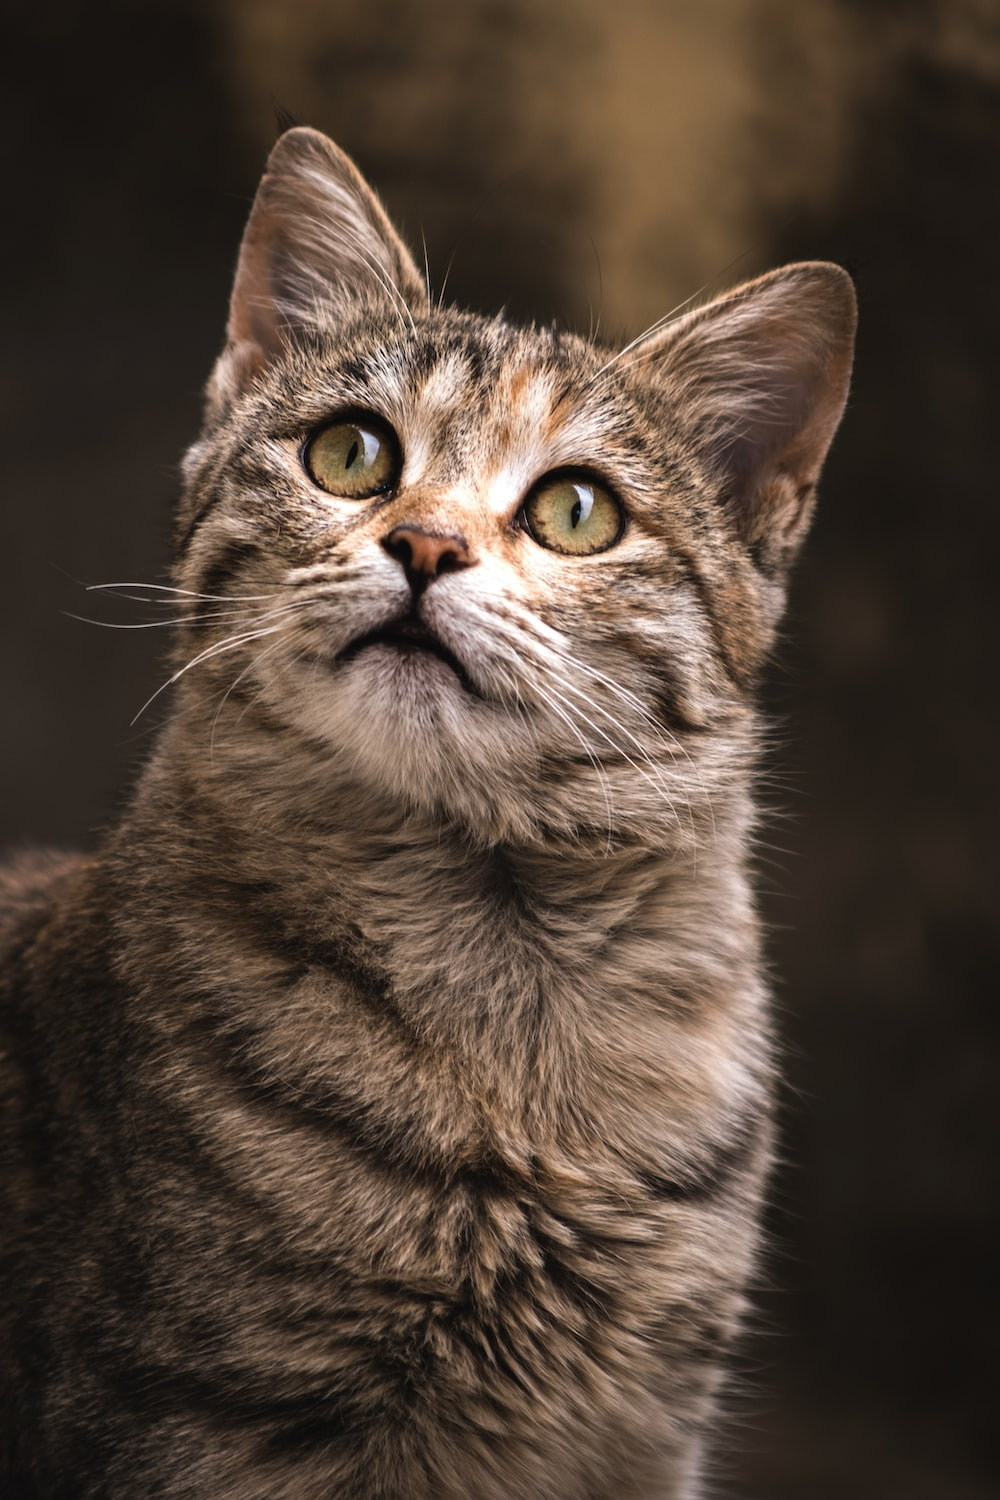

1/1 [==============================] - 1s 970ms/step
[[ 3.5524411 -3.6096985]]
0
The image represent as a CAT


In [ ]:
input_image_path = input('Path of the image to predicted : ' )

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represent as a CAT')
else:
  print('The image represent as a DOG')